In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


WEEK 1
# **Step 1: Load and Explore the Dataset**
 1) Import Libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2) Load the Dataset.

In [5]:
df = pd.read_csv("/content/Task Catagories.csv.csv")
df.head()

,Task Description,Category,Skill
0,Implement user authentication,backend,spring boot
1,Optimize server performance,backend,asp.net
2,Manage database operations,backend,django
3,Implement user authentication,backend,api
4,Build a microservice,backend,kotlin


3) Basic Exploration

In [6]:
df.info()           # Check data types and non-null counts
df.shape            # Rows and columns
df.columns          # Column names
df.describe()       # Stats for numeric columns
df.isnull().sum()   # Check for missing values
df.duplicated().sum()  # Check for duplicates

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20122 entries, 0 to 20121
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Task Description  20122 non-null  object
 1   Category          20122 non-null  object
 2   Skill             20122 non-null  object
dtypes: object(3)
memory usage: 471.7+ KB


np.int64(19333)

#**Step 2: Data Cleaning**
 1) Remove Duplicates

In [7]:
df = df.drop_duplicates()

2**)  Drop Irrelevant or Empty Columns**

In [8]:
df = df.drop(columns=['Unnamed: 0', 'ID', 'Timestamp'], errors='ignore')

**3)Handle Missing Data.**

In [9]:
df = df.dropna(subset=['Task Description'])  # Drop rows with missing task descriptions

**4)Normalize Text**

In [10]:
df['Task Description'] = df['Task Description'].str.lower().str.strip()

# **Step 3: NLP Preprocessing**
1) Import NLP Tools

In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Download the missing resource

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

**2)Preprocess Function**

In [12]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha()]  # Remove punctuation/numbers
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    tokens = [stemmer.stem(word) for word in tokens]  # Apply stemming
    return " ".join(tokens)

df['clean_task'] = df['Task Description'].apply(preprocess)
df[['Task Description', 'clean_task']].head()

,Task Description,clean_task
0,implement user authentication,implement user authent
1,optimize server performance,optim server perform
2,manage database operations,manag databas oper
3,implement user authentication,implement user authent
4,build a microservice,build microservic


# Quick EDA Visuals.
for most common Words.

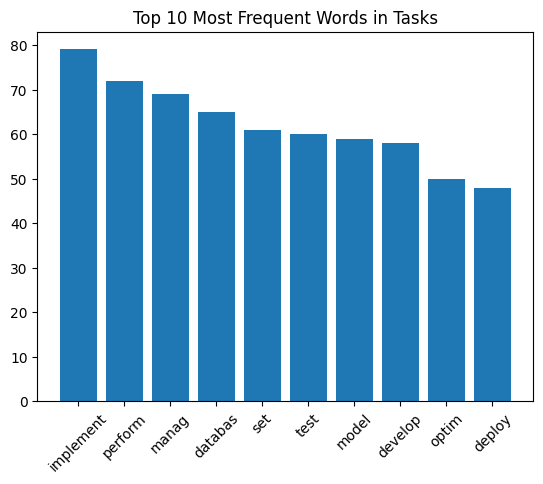

In [13]:
from collections import Counter
import matplotlib.pyplot as plt

all_words = " ".join(df['clean_task']).split()
word_freq = Counter(all_words)
most_common = word_freq.most_common(10)

words, counts = zip(*most_common)
plt.bar(words, counts)
plt.title("Top 10 Most Frequent Words in Tasks")
plt.xticks(rotation=45)
plt.show()

WEEK 2
# **Feature Extraction**
1)TF-IDF Vectorization

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=3000)  # You can increase max_features if needed
X = vectorizer.fit_transform(df['clean_task'])   # This is your input feature matrix

2)Labels

In [15]:
y = df['Category']

# **Task Classification**
1)Train/Test Split

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2)Naive Bayes Classifier

In [17]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

3)Support Vector Machine (SVM)

In [18]:
from sklearn.svm import LinearSVC
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Evaluation

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# For Naive Bayes
print("Naive Bayes Metrics:")
print(classification_report(y_test, y_pred_nb))

# For SVM
print("SVM Metrics:")
print(classification_report(y_test, y_pred_svm))

Naive Bayes Metrics:
                         precision    recall  f1-score   support

                  ai/ml       0.96      0.96      0.96        24
                backend       0.87      0.96      0.92        28
                  cloud       1.00      0.67      0.80         3
database administration       0.92      1.00      0.96        11
             deployment       0.86      1.00      0.92        12
                 devops       1.00      0.84      0.91        19
          documentation       1.00      1.00      1.00         8
               frontend       1.00      0.95      0.98        22
     project management       1.00      1.00      1.00        15
                testing       1.00      1.00      1.00        15
           ui/ux design       0.00      0.00      0.00         1

               accuracy                           0.95       158
              macro avg       0.87      0.85      0.86       158
           weighted avg       0.95      0.95      0.95       158

S

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Week 3
#  Priority Prediction Model using Random Forest / XGBoost

1) Prepare Features & Labels

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF for task text
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['clean_task'])

# Labels for priority (e.g., 'High', 'Medium', 'Low')

2) Train-Test Split

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3)Train Models

Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

 XGBoost

In [29]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Encode target labels to numerical labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train_encoded)
y_pred_xgb = xgb_model.predict(X_test)

# If you need the original labels for evaluation, you can inverse transform
y_pred_xgb_original = label_encoder.inverse_transform(y_pred_xgb)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [05:44:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


4)Evaluate Model.

In [31]:
from sklearn.metrics import classification_report

print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))

print("XGBoost Performance:")
print(classification_report(y_test, y_pred_xgb_original))

Random Forest Performance:
                         precision    recall  f1-score   support

                  ai/ml       0.88      0.96      0.92        24
                backend       0.93      0.96      0.95        28
                  cloud       1.00      0.67      0.80         3
database administration       0.92      1.00      0.96        11
             deployment       1.00      0.92      0.96        12
                 devops       0.95      0.95      0.95        19
          documentation       1.00      1.00      1.00         8
               frontend       1.00      0.95      0.98        22
     project management       1.00      0.93      0.97        15
                testing       0.94      1.00      0.97        15
           ui/ux design       0.00      0.00      0.00         1

               accuracy                           0.95       158
              macro avg       0.87      0.85      0.86       158
           weighted avg       0.95      0.95      0.95       

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

# **Integrate Workload Balancing Logic**

In [35]:
# Example: Assume each user should not have > N tasks
# user_tasks = df.groupby('assigned_to').size() # This will still cause a KeyError if 'assigned_to' doesn't exist

# If you want to count tasks per category as an example:
user_tasks = df.groupby('Category').size()


# Assign new task to user with minimum current load
# next_user = user_tasks.idxmin() # This logic depends on having 'assigned_to' and a list of users

# **GridSearchCV for Hyperparameter Tuning**

In [36]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.9365982095839915


Finalize Models for:
a) Task Classification
b) Priority Prediction

In [38]:
# Final training with full data
final_task_model = LinearSVC()
final_task_model.fit(X, y) # Use X and y for training

# If you have a priority column and want to train a priority model:
# final_priority_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
# final_priority_model.fit(X, y_priority_encoded) # Use X and the encoded priority labels

LinearSVC()

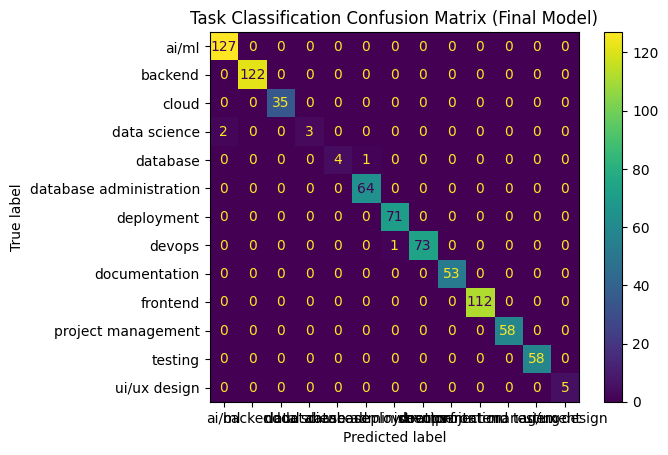

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# For the final task classification model
ConfusionMatrixDisplay.from_estimator(final_task_model, X, y)
plt.title("Task Classification Confusion Matrix (Final Model)")
plt.show()

# Confusion matrix for the priority model (commented out as y_priority and final_priority_model are not fully defined in the notebook)
# ConfusionMatrixDisplay.from_estimator(final_priority_model, X_tfidf, y_priority)
# plt.title("Priority Prediction Confusion Matrix")
# plt.show()

Compile Performance Metrics



In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

def get_metrics(y_true, y_pred, model_name):
    return {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_true, y_pred, average='weighted'),
        'F1-Score': f1_score(y_true, y_pred, average='weighted')
    }

# Task Classification Metrics (SVM)
task_metrics_svm = get_metrics(y_test, y_pred_svm, "SVM (Task Classifier)")

# Task Classification Metrics (XGBoost)
task_metrics_xgb = get_metrics(y_test, y_pred_xgb_original, "XGBoost (Task Classifier)")


# Combine into DataFrame
import pandas as pd

results_df = pd.DataFrame([task_metrics_svm, task_metrics_xgb])
results_df.set_index('Model', inplace=True)
results_df.round(3)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Accuracy,Precision,Recall,F1-Score
Model,,,,
SVM (Task Classifier),0.962,0.964,0.962,0.962
XGBoost (Task Classifier),0.956,0.952,0.956,0.952


from matplotlib import pyplot as plt
_df_0['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Precision'].plot(kind='hist', bins=20, title='Precision')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Recall'].plot(kind='hist', bins=20, title='Recall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['F1-Score'].plot(kind='hist', bins=20, title='F1-Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Accuracy', y='Precision', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Precision', y='Recall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Recall', y='F1-Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Precision'].plot(kind='line', figsize=(8, 4), title='Precision')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Recall'].plot(kind='line', figsize=(8, 4), title='Recall')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['F1-Score'].plot(kind='line', figsize=(8, 4), title='F1-Score')
plt.gca().spines[['top', 'right']].set_visible(False)

Visualize Confusion Matrices.

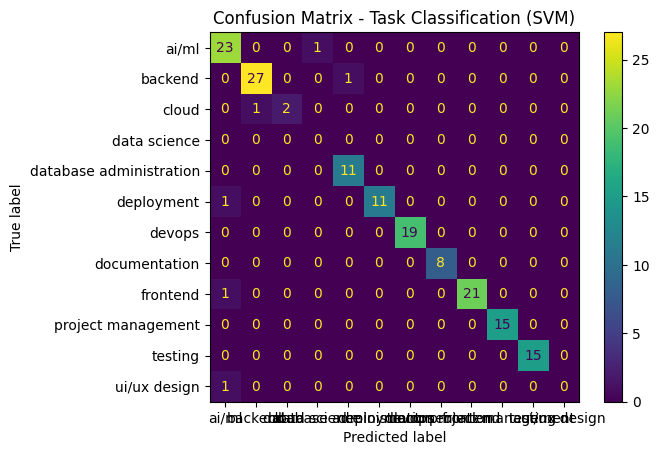

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix - Task Classification (SVM)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm)
plt.title("Confusion Matrix - Task Classification (SVM)")
plt.show()

# Confusion Matrix - Priority Prediction (Commented out as variables are not defined)
# ConfusionMatrixDisplay.from_predictions(y_test_priority, y_pred_xgb)
# plt.title("Confusion Matrix - Priority Prediction (XGBoost)")
# plt.show()

Bar Chart Comparison of Models.

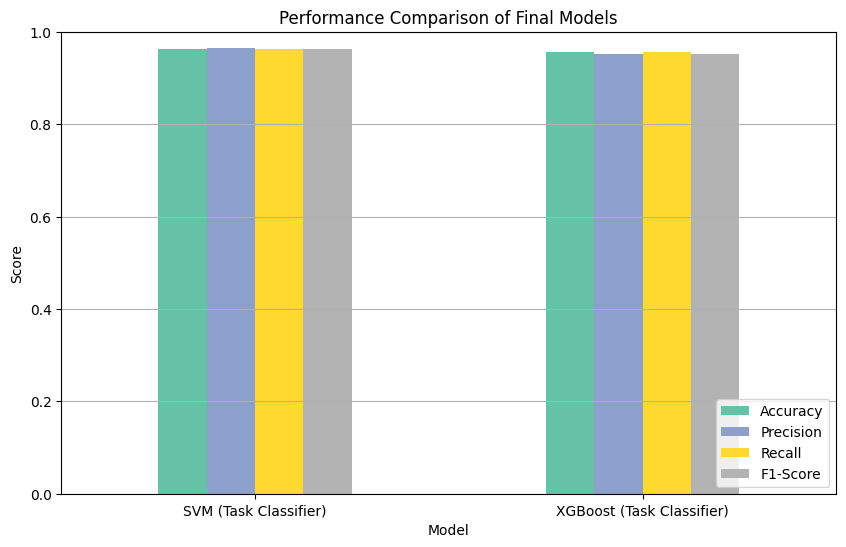

In [45]:
results_df.plot(kind='bar', figsize=(10,6), ylim=(0,1), colormap='Set2')
plt.title("Performance Comparison of Final Models")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(loc='lower right')
plt.show()

Display Sample Predictions



In [47]:
# Create a DataFrame to show input task, predicted class & priority
sample_df = df[['Task Description']].copy()
sample_df['Predicted_Class'] = final_task_model.predict(X) # Use X for prediction
# sample_df['Predicted_Priority'] = final_priority_model.predict(X_tfidf) # Commented out as priority model not fully implemented
sample_df.head(10)  # Show 10 rows

,Task Description,Predicted_Class
0,implement user authentication,backend
1,optimize server performance,backend
2,manage database operations,backend
3,implement user authentication,backend
4,build a microservice,backend
5,optimize server performance,backend
7,optimize server performance,backend
8,optimize server performance,backend
9,optimize server performance,backend
10,develop an api,backend


Save Results to CSV

In [48]:
sample_df.to_csv("sample_task_predictions.csv", index=False)
results_df.to_csv("model_performance_summary.csv")